In [1]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def y_gen(x):
    h_11 = math.tanh(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = math.tanh(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = math.tanh(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = 1/(1 + np.exp(-(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])))
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

In [2]:
# Spliting dataset into training, validation, and test.
# DO NOT MODIFY THIS PART

from sklearn.model_selection import train_test_split

r = 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=r)
partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, y_train, test_size=r)

*** Write down your answer here ***

Formula for Layer 1 Weights:
$$
\frac{\partial L}{\partial \vec{W}^{\,(1)}} = \frac{1}{m} (A^{(2)} - Y) \cdot \tanh'(Z^{(1)}) \cdot X^T
$$

Formula for Layer 2 Weights:
$$
\frac{\partial L}{\partial \vec{W}^{\,(2)}} = \frac{1}{m} (A^{(2)} - Y) \cdot A^{(1)T}
$$

Formula for Layer 1 Biases:
$$
\frac{\partial L}{\partial \vec{b}^{\,(1)}} = \frac{1}{m} \sum (A^{(2)} - Y) \cdot \tanh'(Z^{(1)})
$$

Formula for Layer 2 Biases:
$$
\frac{\partial L}{\partial \vec{b}^{\,(2)}} = \frac{1}{m} \sum (A^{(2)} - Y)
$$


In [13]:
# Replace this part with your own code without using any deep learning library

class CustomNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01  # Weights for layer 1
        self.b1 = np.zeros((hidden_size, 1))                       # Biases for layer 1
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01  # Weights for layer 2
        self.b2 = np.zeros((output_size, 1))                       # Biases for layer 2

    # Sigmoid activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Derivative of sigmoid function
    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    # Hyperbolic tangent (tanh) activation function
    def tanh(self, z):
        return np.tanh(z)

    # Derivative of tanh function
    def tanh_derivative(self, z):
        return 1 - np.tanh(z) ** 2

    # Forward pass
    def forward(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1  # Linear activation for layer 1
        self.A1 = self.tanh(self.Z1)            # Non-linear activation using tanh
        self.Z2 = np.dot(self.W2, self.A1) + self.b2  # Linear activation for layer 2
        self.A2 = self.sigmoid(self.Z2)         # Non-linear activation using sigmoid
        return self.A2

    # Compute mean squared error loss
    def compute_loss(self, Y, Y_hat):
        return 0.5 * np.mean((Y - Y_hat) ** 2)

    # Backward pass (backpropagation)
    def backward(self, X, Y, Y_hat):
        m = X.shape[1]

        # Derivatives for layer 2
        dZ2 = Y_hat - Y   # Loss derivative for output layer
        dW2 = (1 / m) * np.dot(dZ2, self.A1.T)  # Weight gradient for layer 2
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # Bias gradient for layer 2

        # Derivatives for layer 1
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.tanh_derivative(self.Z1)  # Apply the derivative of tanh
        dW1 = (1 / m) * np.dot(dZ1, X.T)  # Weight gradient for layer 1
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)  # Bias gradient for layer 1

        return dW1, db1, dW2, db2

    # Update parameters using gradient descent
    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    # Train the model for multiple epochs
    def train(self, X_train, Y_train, X_val, Y_val, epochs, learning_rate):
        loss_values = []
        val_loss_values = []
        
        for epoch in range(epochs):
            # Forward pass
            Y_hat = self.forward(X_train)

            # Compute loss
            loss = self.compute_loss(Y_train, Y_hat)
            loss_values.append(loss)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X_train, Y_train, Y_hat)

            # Update weights and biases
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)

            # Validation loss
            val_Y_hat = self.forward(X_val)
            val_loss = self.compute_loss(Y_val, val_Y_hat)
            val_loss_values.append(val_loss)

            # Print loss for each epoch
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss}, Val Loss: {val_loss}')
        
        return loss_values, val_loss_values

    # Predict function
    def predict(self, X_test):
        Y_hat = self.forward(X_test)
        return Y_hat

# Preparing the data
x_train = np.array(partial_x_train).T
y_train = np.array(partial_y_train).reshape(1, -1)  # Reshape to match dimensions
x_val = np.array(x_val).T
y_val = np.array(y_val).reshape(1, -1)
x_test = np.array(x_test).T

# Ensure the shapes of training and validation data are correct
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")

# Initialize the custom neural network
nn = CustomNeuralNetwork(input_size=2, hidden_size=3, output_size=1)

# Train the model
epochs = 60
learning_rate = 0.01
loss_values, val_loss_values = nn.train(x_train, y_train, x_val, y_val, epochs, learning_rate)

# Create history_dict to store the loss values for compatibility with the visualization code
history_dict = {
    'loss': loss_values,
    'val_loss': val_loss_values
}

# Predict for the test set
y_pred = nn.predict(x_test)

x_train shape: (2, 168), y_train shape: (1, 168)
x_val shape: (2, 57), y_val shape: (1, 57)
x_test shape: (2, 75)
Epoch 0, Loss: 0.019942485380351888, Val Loss: 0.022127225516137626
Epoch 10, Loss: 0.01990759527593856, Val Loss: 0.022147205266691963
Epoch 20, Loss: 0.019874407075449095, Val Loss: 0.022167525708141823
Epoch 30, Loss: 0.019842837841394928, Val Loss: 0.022188137446445665
Epoch 40, Loss: 0.019812808644679308, Val Loss: 0.02220899430471187
Epoch 50, Loss: 0.01978424437507033, Val Loss: 0.022230053148757044


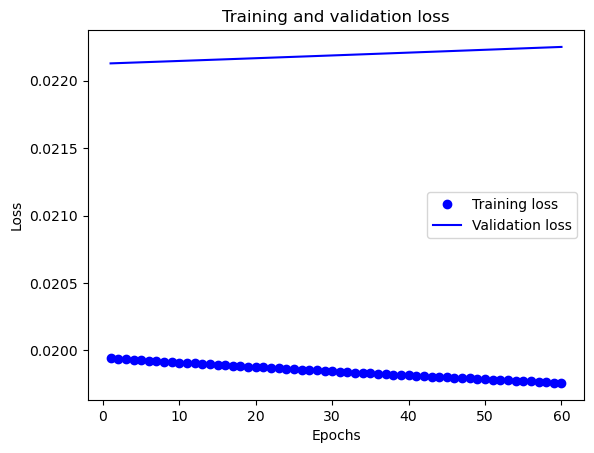

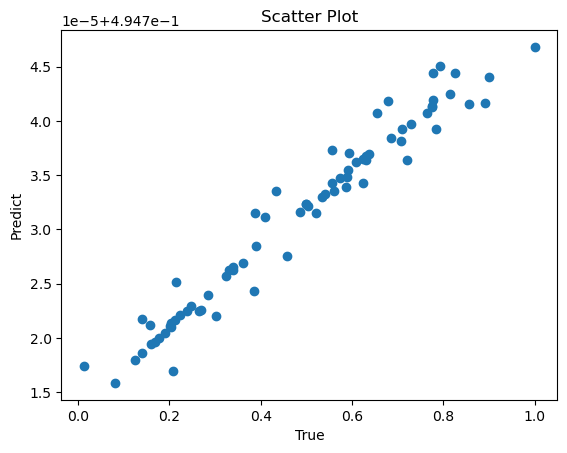

In [14]:
# Visualizing losses and prediction
# DO NOT MODIFY THIS PART

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Scatter Plot')
plt.xlabel('True')
plt.ylabel('Predict')
plt.scatter(y_test, y_pred)